# AWS Rekognition Text Detection Test

In [1]:
import boto3
s3_resource = boto3.resource('s3')
client=boto3.client('rekognition')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE 1

In [3]:
bucket='secondpythonbucket6ce9cccf-c429-471c-99a1-f36e849ee381'
photo='00007-4883-13_DB18ED97.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if text['Id'] < 7:
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:12-
Confidence: 93.96%


Detected text:11
Confidence: 91.60%


Detected text:GS
Confidence: 98.74%


Detected text:10
Confidence: 92.72%


Detected text:9
Confidence: 91.42%


Detected text:8
Confidence: 93.61%


Detected text:6
Confidence: 90.53%




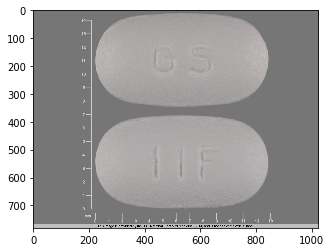

In [4]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/00007-4883-13_DB18ED97.jpg')
plt.imshow(pill_img);

IMAGE 2

In [5]:
photo='009045988.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    #if text['Id'] < 7:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:225
Confidence: 99.75%


Detected text:225
Confidence: 99.75%




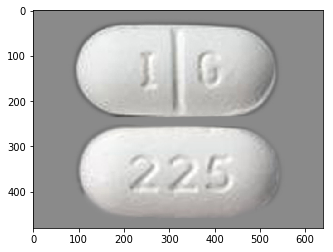

In [6]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/009045988.jpg')
plt.imshow(pill_img);

IMAGE 3

In [7]:
photo='006035484.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:54 84
Confidence: 98.81%


Detected text:V
Confidence: 95.97%


Detected text:V
Confidence: 95.97%


Detected text:54
Confidence: 99.12%


Detected text:84
Confidence: 98.50%




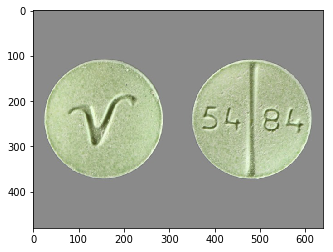

In [8]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/006035484.jpg')
plt.imshow(pill_img);

IMAGE 4

In [9]:
photo='007773107.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:DISTA PROZAC
Confidence: 99.98%


Detected text:40 mg mg
Confidence: 90.95%


Detected text:3107
Confidence: 99.97%


Detected text:PROZAC
Confidence: 99.98%


Detected text:DISTA
Confidence: 99.98%


Detected text:40 mg
Confidence: 91.80%


Detected text:mg
Confidence: 90.11%




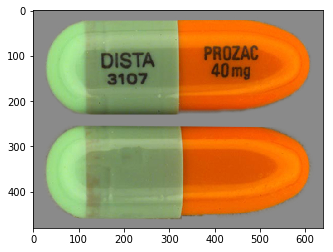

In [10]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/007773107.jpg')
plt.imshow(pill_img);

### Let's try to manipulate an image from S3 Bucket

We'll try to cut the image in half to split into 2 images 
(To mimic a scenario where a user will send pictures of front and back of pill)

Then we'll seek to read text from each and keep unique pieces of text (but only those with "Confidence" > 85%)

IMAGE 5

In [11]:
photo='007811655.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:PVK 500
Confidence: 99.73%


Detected text:66 950
Confidence: 95.93%


Detected text:PVK
Confidence: 99.68%


Detected text:500
Confidence: 99.79%


Detected text:66
Confidence: 93.53%


Detected text:950
Confidence: 98.32%




### How to get url of file uploaded on AWS S3 bucket?

https://region_name.amazonaws.com/buket_name/object_name

### Getting Image from S3 and Splitting into 2 Images

In [13]:
# Downloading image
s3_resource = boto3.resource('s3')

s3_resource.Object(bucket, photo).download_file(f'./{photo}')

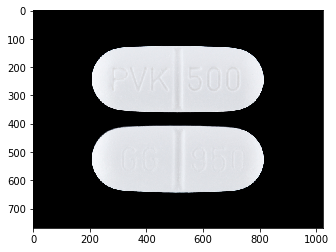

In [14]:
import imageio
import matplotlib.pyplot as plt

pic = imageio.imread('./007811655.jpg')
plt.imshow(pic);

In [15]:
pic.shape

(768, 1024, 3)

In [16]:
height, width = pic.shape[:2]

# Cut the image in half
height_cutoff = height // 2
s1 = pic[:height_cutoff,:]
s2 = pic[height_cutoff:,:]

# Save each half
imageio.imwrite('img1.png', s1)
imageio.imwrite('img2.png', s2)

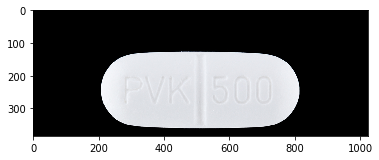

In [17]:
pic1 = imageio.imread('./img1.png')
plt.imshow(pic1);

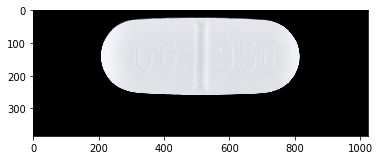

In [18]:
pic2 = imageio.imread('./img2.png')
plt.imshow(pic2);

In [19]:
photo='597620119.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:PD
Confidence: 97.26%


Detected text:270
Confidence: 99.66%


Detected text:PD
Confidence: 97.26%


Detected text:270
Confidence: 99.66%




In [21]:
import pandas as pd
df_txt  = pd.DataFrame(textDetections)
df_txt = df_txt.drop(['Geometry', 'Id', 'ParentId', 'Type'], axis=1)
df_txt

,Confidence,DetectedText
0,97.256027,PD
1,99.658211,270
2,97.256027,PD
3,99.658211,270


In [22]:
df1 = df_txt.groupby('DetectedText').count()
df1

,Confidence
DetectedText,
270,2
PD,2


### Code to Get Unique Text Sets for Rekognition Dectection

In [23]:
text_found = []
for text in textDetections:
    text_found.append(text['DetectedText'])
text_set = list(set(text_found))
text_set

['PD', '270']

In [24]:
text_found

['PD', '270', 'PD', '270']

## Testing Rekognition with 1 and 2 Sided Test Images

### Uploading Cropped Text Images

- Took images from PillBox and divided them to have 1 image for each side

- Uploaded images into an S3 bucket

In [25]:
import os

img_bucket_name = 'firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

path = './test_images'
# counting files uploaded
# n_count = 0 

# for filename in os.listdir(path):
#     s3_resource.Object(img_bucket_name, 
#                        filename).upload_file(
#                        Filename=f'./test_images/{filename}')
#     n_count += 1

# print(f'Number of files uploaded: {n_count}')

Number of files uploaded: 14


### Reading Text from Test Images

To be read in pairs (Side A & Side B)

#### First Image Test

In [77]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img7a.JPG', 'img7b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []
all_confLevels = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    confLevel_found = []
    
    for text in textDetections:
        text_found.append(text['DetectedText'])
        confLevel = "{:.2f}".format(text['Confidence']) + "%"
        confLevel_found.append(confLevel)
    
    text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_set)
    all_confLevels.append(confLevel_found)

In [71]:
all_text

[['5/500'], ['5712']]

In [78]:
all_confLevels

[['97.75%', '97.75%'], ['88.60%', '88.60%']]

In [69]:
reversed_text = all_text.copy()
reversed_text.reverse()

In [70]:
reversed_text

[['5712'], ['5/500']]

#### Second Image Test

Here It throws varying results.

Will need to Limit results not just based on **"unique" text blobs** but also based on **confidence level**

In [88]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img4a.JPG', 'img4b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []
all_confLevels = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    confLevel_found = []
    
    for text in textDetections:
        if text['Confidence'] > 87:
            text_found.append(text['DetectedText'])
            confLevel = "{:.2f}".format(text['Confidence']) + "%"
            confLevel_found.append(confLevel)
    
    #text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_found)
    all_confLevels.append(confLevel_found)

In [89]:
all_text

[[], ['1003']]

Confidence levels are higher for two 'S's and '1003'. Both above 85%

In [90]:
all_confLevels

[[], ['92.88%']]

#### Third Image Test

In [125]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img4a.JPG', 'img4b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []
all_confLevels = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    confLevel_found = []
    
    for text in textDetections:
        if text['Confidence'] > 85:
            text_found.append(text['DetectedText'])
            confLevel = "{:.2f}".format(text['Confidence']) + "%"
            confLevel_found.append(confLevel)
    
    #text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_found)
    all_confLevels.append(confLevel_found)

In [126]:
all_text

[['S', 'S'], ['1003']]

In [127]:
all_confLevels

[['85.30%', '85.30%'], ['92.88%']]

In [128]:
all_split_text = []
for text_list in all_text:
    if len(text_list) > 0:
        for text in text_list:
            text_split = re.split('(\D+)', text)
            all_split_text.append(text_split)

unique_list = []
for each in all_split_text:
    unique_list.append([i for i in each if i])
    
unique_list

[['S'], ['S'], ['1003']]

Flattening list of lists returned:

In [129]:
text_list = [blob for sublist in all_text for blob in sublist]
text_list = list(set(text_list))
text_list

['1003', 'S']

List of text blobs split where digits and letters are together:

In [130]:
unique_list = []
for each in text_list:
    num_split = re.findall(r'[A-Za-z]+|\d+', each)
    unique_list.append(num_split)
    
unique_list = [blob for sublist in unique_list for blob in sublist]
unique_list

['1003', 'S']

### Now as a Function

In [143]:
# Text  Dectection Function
def text_detection(filename_list):
    
    #THIS IS A TEST BUCKET
    bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

    # Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
    # Will contain a list per side (2 lists)
    all_text = []

    # Looping through each image in "photo_sides" list
    for file in filename_list:
        # Detecting Text from Specified Image in S3 Bucket
        response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':file}})

        # Detected Text (List of Dictionaries)
        textDetections=response['TextDetections']

        # Parsing Through Detected Text and 
        # Making list of Unique Sets of Text Dectected
        text_found = []

        for text in textDetections:
            if text['Confidence'] > 87:
                text_found.append(text['DetectedText'])

        text_set = list(set(text_found))
        
        # Appending detected text in image to "all_text" list
        all_text.append(text_set)
        
    # Flattening 'all_text' (list of lists) into 1 list
    text_list = [blob for sublist in all_text for blob in sublist]
    text_list = list(set(text_list))
    
    # Splitting any text blob that may have digits and numbers together
    unique_list = []
    for each in text_list:
        num_split = re.findall(r'[A-Za-z]+|\d+', each)
        unique_list.append(num_split)
        
    # Flattening again into one list with just unique values
    unique_list = [blob for sublist in unique_list for blob in sublist]
        
    return unique_list

### Passing image pairs into `text_detection` function

#### Testing function on `img3a.JPG` and `img3b.JPG`

NEED TO RETURN NONE OR SOMETHING ALIKE WHEN STRING IN LIST IS < 1  
==>>> For this image it only reads one digit! ('9') but with confidence below 87%

In [136]:
# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img3a.JPG', 'img3b.JPG']

text_detection(photo_sides)

[]

For 'img3a.JPG' it does not detect anything

In [137]:
photo='img3a.JPG'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected text


#### Testing function on img4a.JPG and img4b.JPG

In [138]:
photo_sides=['img4a.JPG', 'img4b.JPG']

text_detection(photo_sides)

['1003']

#### Testing function on img6a.JPG and img6b.JPG

In [140]:
photo_sides=['img6a.JPG', 'img6b.JPG']

text_detection(photo_sides)

['COSTAS', 'DS']

#### Testing function on img1a.JPG and img1b.JPG

In [144]:
photo_sides=['img1a.JPG', 'img1b.JPG']

text_detection(photo_sides)

['66', '950', 'PVK', '500', '500', '950', 'PVK']

Will turning the Object from S3 into grayscale help?

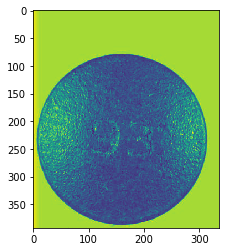

In [31]:
from skimage.exposure import rescale_intensity
from skimage import color
obj_key = 'img3a.JPG'
obj = s3_resource.Object(bucket, obj_key)
obj_body = obj.get()['Body'].read()

photo = imageio.imread(obj_body)
bw_photo = rescale_intensity(color.rgb2gray(photo))

plt.imshow(bw_photo);

### AWS --> Analyzing an Image Loaded from a Local File System

https://docs.aws.amazon.com/rekognition/latest/dg/images-bytes.html

The following AWS SDK for Python example shows how to load an image from the local file system and call the detect_labels operation. Change the value of imageFile to the path and file name of an image file (.jpg or .png format).

```
import boto3

if __name__ == "__main__":

    imageFile='input.jpg'
    client=boto3.client('rekognition')
   
    with open(imageFile, 'rb') as image:
        response = client.detect_labels(Image={'Bytes': image.read()})
        
    print('Detected labels in ' + imageFile)    
    for label in response['Labels']:
        print (label['Name'] + ' : ' + str(label['Confidence']))

    print('Done...')

```

In [39]:
import base64

obj_key = 'img3a.JPG'
obj = s3_resource.Object(bucket, obj_key)
obj_body = obj.get()['Body'].read()

photo = imageio.imread(obj_body)
bw_photo1 = rescale_intensity(color.rgb2gray(photo))

# base64 encoding
photo_base64 = base64.b64encode(bw_photo1)
# photo_base64

response=client.detect_text(Image={'Bytes': photo_base64})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

InvalidImageFormatException: An error occurred (InvalidImageFormatException) when calling the DetectText operation: Request has invalid image format

In [40]:
photo_base64

b'J21TPXoQ7z8nbVM9ehDvP61WOjOWze4/M0AhKbKK7j8/E+8U6gTuP8X81QoGwu0/Sea8ACJ/7T9J5rwAIn/tP9qiceJ1tuw/YIxY2JFz7D/mdT/OrTDsP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/bF8mxMnt6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuuWq6z/ySA265arrP/JIDbrlqus/8kgNuu

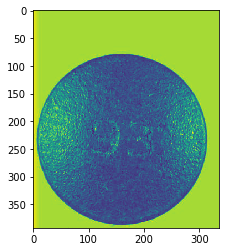

In [35]:
plt.imshow(bw_photo1);